In [94]:
import cv2
from matplotlib import pyplot as plt

In [95]:
img = cv2.imread("data/solidWhiteCurve.jpg")
img  = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

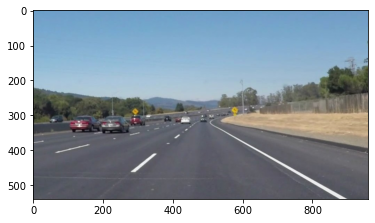

In [96]:
plt.imshow(img)

In [97]:
img.shape # make the shape for all images

(540, 960, 3)

## color selection

Text(0.5, 1.0, 'input')

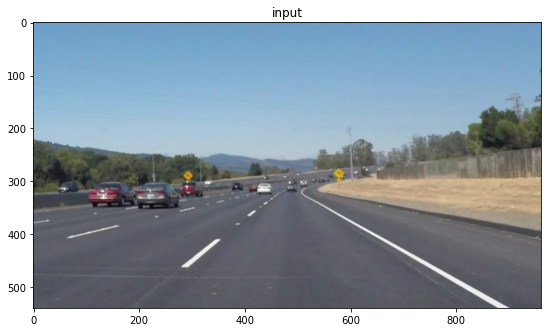

In [98]:
out = img.copy()
#threshold = (out[:, :, 0] < 200) | (out[:, :, 1] < 200) | (out[:, :, 2] < 200) # boolen true for (not white)
#print(threshold)

#out[threshold] = [0, 0, 0]

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("input")




## Grayscale

(540, 960)

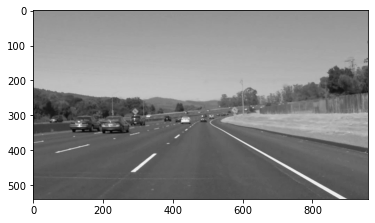

In [100]:
gray = cv2.cvtColor(out , cv2.COLOR_RGB2GRAY)
plt.imshow(gray , cmap="gray")
gray.shape 

## Dilate

In [101]:
#gray = cv2.dilate(gray, (5, 5))

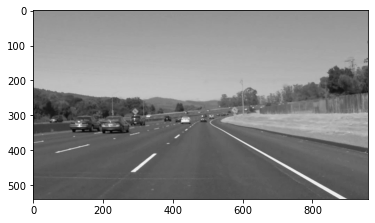

In [102]:
plt.imshow(gray, cmap="gray")

## Gaussian blur

(540, 960)

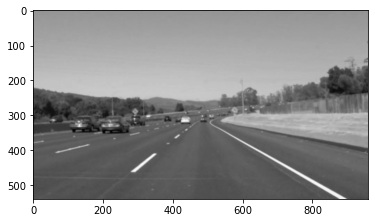

In [103]:
blur = cv2.GaussianBlur(gray ,(5,5),0)
plt.imshow(blur , cmap="gray")
blur.shape

## Canny edge detector

In [ ]:
import numpy as np
sigma = 0.23
med = np.median(blur)
Lower = int(max(0, (1.0 - sigma) * med))
Upper = int(min(255, (1.0 + sigma) * med))
#cc = cv2.Canny(blur, Lower, Upper)

cc = cv2.Canny(blur, 200, 300)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(blur, cmap="gray")
plt.title("blur")

plt.subplot(1,2,2)
plt.imshow(cc, cmap="gray")
plt.title("canny")

## focused region

In [ ]:
height, width = cc.shape
print("height %d, width %d" % (height, width))

def focus_region(cc, vertices):
    mask = np.zeros_like(cc)
    #print(mask.shape)
    if len(cc.shape) > 2:
        ignore_mask_color = (255,) * img.shape[2]
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(cc, mask)
    return masked_image



vertices = np.array([[(0, height),(width / 2, height / 2),(width, height)]], dtype=np.int32)
#vertices = [(0, height), (width/2, height/2), (width, height)]

edges = focus_region(cc , vertices)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(cc, cmap="gray")
plt.title("canny")

plt.subplot(1,2,2)
plt.imshow(edges, cmap="gray")
plt.title("edges")


## Hough transform

In [ ]:
Lines = cv2.HoughLinesP(edges, rho=6, theta=np.pi/60,threshold=160, 
                        lines=np.array([]), minLineLength=40, maxLineGap=25)

In [ ]:
print(Lines)
# (x1, y1, x2, y2)

In [ ]:
LineImg= np.zeros((edges.shape[0] , edges.shape[1], 3), dtype=np.uint8)

In [ ]:
LineImg.shape

In [ ]:
for cod in Lines:
    for x1, y1, x2, y2 in cod:
        cv2.line(LineImg, (x1, y1), (x2, y2), [255,0,0],5)

In [ ]:
merged = np.copy(img)

In [ ]:
merged.shape

In [ ]:
merged = cv2.addWeighted(merged, 0.8, LineImg, 1.0, 0.0)

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(merged, cmap="gray")
plt.title("out")

plt.subplot(1,2,2)
plt.imshow(LineImg, cmap="gray")
plt.title("Line")

